# Análisis exploratorio de los datos

Este proyecto tiene como objetivo identificar factores de riesgo pronóstico asociados al Síndrome de Bajo Gasto Cardíaco (SBGC) en pacientes sometidos a cirugía de revascularización miocárdica en el Hospital Universitario Cardiocentro Ernesto Che Guevara. Para ello, se emplearon técnicas de inteligencia artificial (IA), específicamente algoritmos de aprendizaje supervisado como Decision Tree y Random Forest.

En este notebook se detallan, paso a paso, los procedimientos realizados durante el análisis exploratorio de los datos, con el fin de comprender mejor la estructura del conjunto de datos y detectar patrones iniciales.

## Puesta a punto

En la celda siguiente se cargan las librerías necesarias para garantizar el correcto funcionamiento del notebook.


In [1]:
import pandas as pd
import os

from src.utils import plot_distribution, plot_scaled_variance, plot_mi_scores, get_mi_scores

## Importación de datos

Los datos utilizados en este análisis se encuentran en formato tabular dentro de un archivo Excel. A continuación, se procede a su carga para comenzar con la exploración y el procesamiento.


In [2]:
os.chdir('../')

In [3]:
X = pd.read_excel('data/raw/dataset.xlsx')

## Preprocesamiento

Antes de aplicar cualquier técnica de modelado, es fundamental comprender la estructura del conjunto de datos: qué variables están disponibles, su tipo (numérico, categórico, etc.) y otras características relevantes. Esta etapa permite identificar necesidades de limpieza, transformación y codificación que garanticen un preprocesamiento adecuado para el análisis posterior.


In [4]:
X.columns

Index(['Nombre y apellidos', 'Edad', 'Sexo', 'Café', 'Tabaco', 'Alcohol',
       'APPHTA', 'APPDM', 'APPEPOC', 'APPIRC', 'APPEnfValvular', 'APPIMA',
       'APPAngina', 'APPACV', 'No.LesionesCoronarias', 'LesionACD',
       'Lesion TCI', 'LesionADA', 'LesionACircunfleja', 'BCPIAoPrep',
       'BCPIAoTrans', 'BCPIAoPost', 'Dobutamina', 'Dopamina', 'Norepinefrina',
       'Epinefrina', 'Nitroglicerina', 'Hipoglucemia', 'Hiperglucemia',
       'Hiponatremia', 'Hipernatremia ', 'Hipopotasemia', 'Hiperpotasemia',
       'Acidosis metabólica', 'Alcalosis metabólica', 'Acidosis respiratoria',
       'Alcalosis respiratoria', 'DisfRenalPosop', 'DisfNeuroPosop',
       'DisfHepatPosop', 'FI', 'FE', 'Estadia', 'Egreso', 'Evoluciòn',
       'FEVIPreop', 'TamañoVI', 'AltContractVI', 'AMI', 'AMI+VSI', 'DAMI',
       'DAM + VS', 'PuentesAR', 'PuentesAGep', 'PuentesVen',
       'RevascIncompleta', 'CEC', 'DuracionCEC', 'Uso vasoactivos pst',
       'AltMITransop', 'IMAPeriop', 'Vasoplejia post', 'Hip

In [5]:
X.head()

,Nombre y apellidos,Edad,Sexo,Café,Tabaco,Alcohol,APPHTA,APPDM,APPEPOC,APPIRC,...,BalanceHidrPos,BalanceHidrNeg.,BalanceHidrNeutro,Lactato post,APP CI,HTA post,FEVI post,SvO2,SBGC,PA
0,Martina Vìrgen Olivera Guerra,66.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,5.0,0.0,0.0,45.0,56.0,1.0,NaN
1,Reginald Hajarysingh,63.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.3,0.0,0.0,56.0,78.0,0.0,NaN
2,Miguel Mariano Ornia Margolles,67.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,6.3,0.0,0.0,41.0,55.0,1.0,NaN
3,Miriam Rosa Hernández Trocones,67.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,9.0,0.0,0.0,37.0,41.0,1.0,NaN
4,Tomás Rodríguez Durán,73.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,2.0,1.0,0.0,55.0,78.0,0.0,NaN


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Nombre y apellidos      120 non-null    object        
 1   Edad                    120 non-null    float64       
 2   Sexo                    120 non-null    float64       
 3   Café                    120 non-null    float64       
 4   Tabaco                  120 non-null    float64       
 5   Alcohol                 120 non-null    float64       
 6   APPHTA                  120 non-null    float64       
 7   APPDM                   120 non-null    float64       
 8   APPEPOC                 120 non-null    float64       
 9   APPIRC                  120 non-null    float64       
 10  APPEnfValvular          120 non-null    float64       
 11  APPIMA                  120 non-null    float64       
 12  APPAngina               120 non-null    float64   

A partir de la exploración inicial, se observa la presencia de datos faltantes y variables categóricas. Asimismo, se identifican columnas con valores constantes que no aportan información relevante al modelo, por lo que deben ser eliminadas en el proceso de depuración.

In [7]:
# Eliminar filas con valores problemáticos
X.drop([18, 20, 64, 65, 94, 120], inplace=True)

# Eliminar columnas innecesarias y separar las variables predictoras (X) de la objetivo (y)
X, y = (X.drop(['Nombre y apellidos', 'PA', 'FI', 'FE', 'SBGC'], axis=1), X['SBGC'])

In [8]:
# Variables categóricas
categorical_features = X.select_dtypes(include=object)

categorical_features.columns

Index(['No.LesionesCoronarias', 'Estadia', 'DuracionCEC'], dtype='object')

In [9]:
# Valores que puede tomar la variable
X['No.LesionesCoronarias'].unique()

array([3, 4, 5, 7, 2, 'Multiv', 'Multiv ', 1, 'multiv'], dtype=object)

Se identificaron valores equivalentes escritos de forma inconsistente, como 'Multiv', 'Multiv ' y 'multiv'. Todos hacen referencia a una misma condición clínica: la presencia de más de seis lesiones coronarias o enfermedad del tronco coronario.

Para facilitar el procesamiento por parte de los modelos de aprendizaje automático, se decide reemplazar esta categoría por el valor numérico 7.


In [10]:
X["No.LesionesCoronarias"] = [7 if i in ('Multiv', 'Multiv ', 'multiv') else i
                              for i in X["No.LesionesCoronarias"]]

X["No.LesionesCoronarias"] = X["No.LesionesCoronarias"].astype(int)

In [11]:
# Valores que puede tomar la variable
X['Estadia'].unique()

array([3, 6, 7, 2, 4, 1, 14, 12, '6h', 5, 10, 17, 13, 11, 20, 8, 28, 15,
       27, 19, '3horas'], dtype=object)

En este caso, se identificaron algunas entradas expresadas en horas mediante los textos 'h' o 'horas', mientras que el resto de los valores de la misma variable se encuentra en días. Para unificar la unidad de medida y facilitar su procesamiento, se reemplazarán estas entradas por su equivalente numérico en horas.

In [12]:
# Identificar los valores numéricos
numerical_rows = pd.to_numeric(X["Estadia"], errors="coerce").notna()

# Eliminar el texto no deseado
X["Estadia"] = X["Estadia"].astype(str)
X["Estadia"] = X["Estadia"].str.replace("horas", "")
X["Estadia"] = X["Estadia"].str.replace("h", "")

# Convertir a tipo entero
X["Estadia"] = X["Estadia"].astype(int)

# Convertir de días a horas
X.loc[numerical_rows, "Estadia"] = X.loc[numerical_rows, "Estadia"] * 24

In [13]:
# Valores que puede tomar la variable
X['DuracionCEC'].unique()

array(["130'", "120'", "142'", "101'", "134'", "145'", "152'", "109'",
       "169'", "171'", "137'", "214'", "147'", "165'", "179'", "82'",
       "103'", "124'", "88'", "172'", "200'", "140'", "79'", 140, "143'",
       "321'", 48, "220'", "262'", "141'", "5'", "65'", "271'", "163'",
       "138'", "80'", "155'", 0, "108'", "146'", "94'", "47'", "161'",
       "166'", "139'", "133'", "135'", "132'", "129'", "42'", "188'",
       "70'", "181'", "92'", "102'", "118'", "159'", "154'", "125'",
       "225'", "91'", "90'", "107'", "115'", "160'", "117'", "84'", "96'",
       "76'", "66'", "150'", "198'", "100'", "55'", "144'", "158'",
       "700'", 245, 205, "190'", "85'", "37'"], dtype=object)

La mayoría de las entradas de esta variable contienen el caracter `'` al final, el cual es innecesario para el procesamiento. Por ello, se procede a eliminar este caracter para estandarizar los datos.


In [14]:
X["DuracionCEC"] = X["DuracionCEC"].astype(str)
X["DuracionCEC"] = X["DuracionCEC"].str.replace("'", "")
X["DuracionCEC"] = X["DuracionCEC"].astype(int)

Las variables **FEVI post** y **SvO2** representan valores porcentuales, pero presentan inconsistencias en su formato: algunos valores están expresados como enteros (ej. 50) y otros como decimales (ej. 0.50). Para uniformizar la interpretación y facilitar el procesamiento, se decidió convertir todas las entradas a un formato decimal normalizado entre 0 y 1.

In [15]:
X['FEVI post'] = X['FEVI post'].apply(lambda x: x/100 if x > 1 else x)

In [16]:
X['SvO2'] = X['SvO2'].apply(lambda x: x/100 if x > 1 else x)

Finalmente, los valores faltantes en cada variable se imputaron utilizando la moda (valor más frecuente), lo que permite conservar la distribución original de los datos.

In [17]:
X = X.apply(lambda x: x.fillna(x.mode()[0]) if x.isnull().any() else x)

## Análisis de los datos

Con el fin de obtener una visión general y clara del conjunto de datos, se realizó un análisis preliminar que incluyó:

- Evaluación de la distribución de las clases, para detectar posibles desequilibrios.
- Cálculo de la varianza de cada variable, con el propósito de identificar y eliminar atributos con varianza que no aportan información relevante.
- Cálculo de la información mutua entre cada característica y la variable objetivo, como una primera aproximación para identificar las variables potencialmente más importantes.


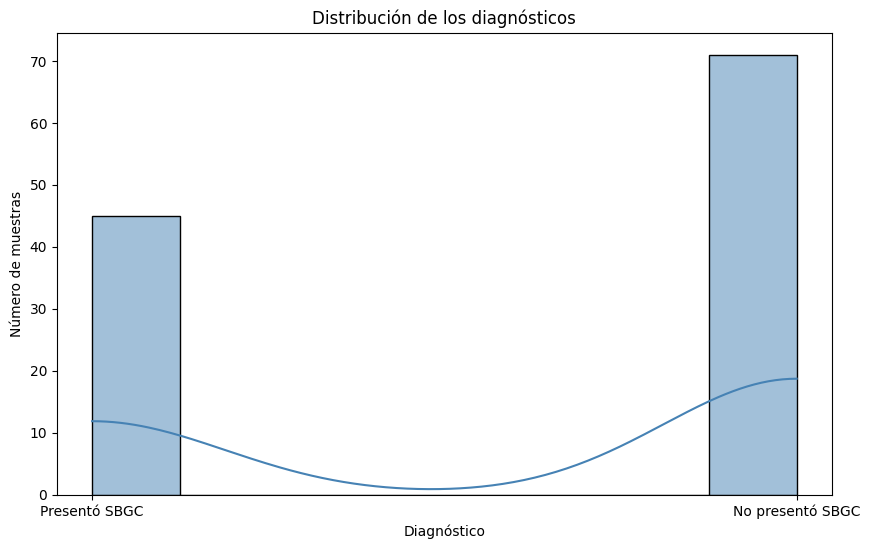

In [18]:
plot_distribution(y, 1)

Como puede observarse en la distribución de clases, los datos se encuentran suficientemente balanceados, lo cual permitió entrenar los modelos sin necesidad de aplicar técnicas de remuestreo.

In [19]:
variance = X.var()
variance

Edad            55.546852
Sexo             0.119940
Café             0.219115
Tabaco           0.247376
Alcohol          0.093553
                  ...    
Lactato post    21.997490
APP CI           0.205322
HTA post         0.113568
FEVI post        0.012003
SvO2             0.023345
Length: 71, dtype: float64

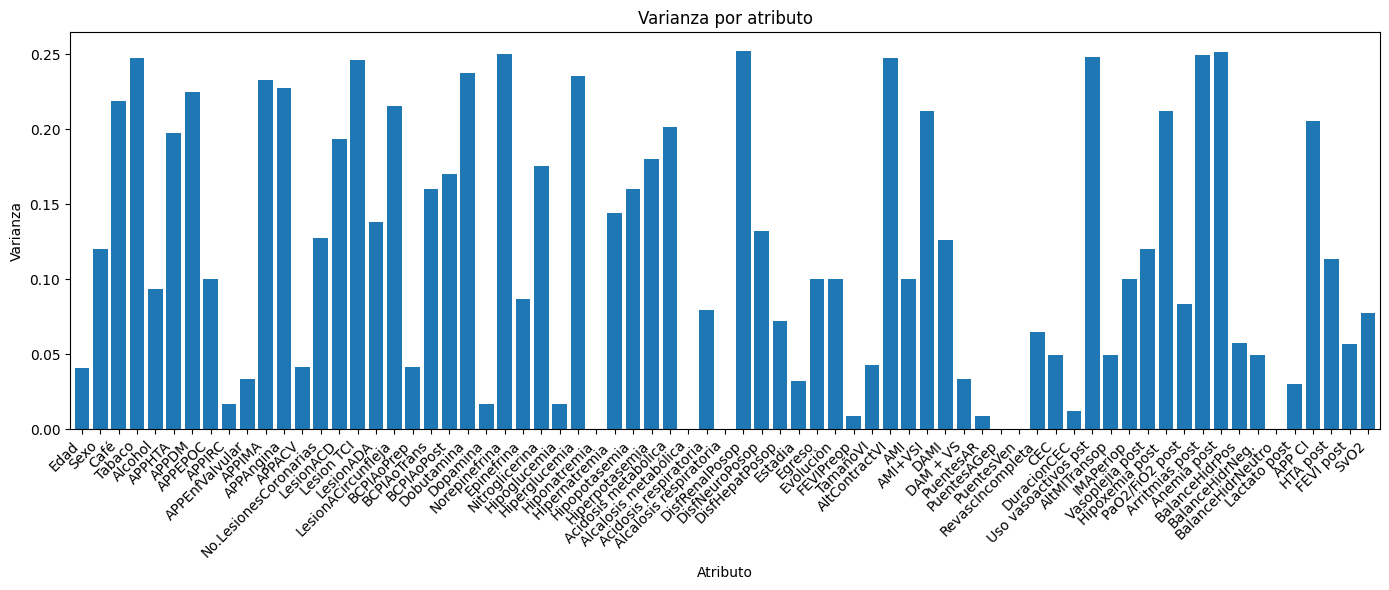

In [20]:
plot_scaled_variance(X, 1)

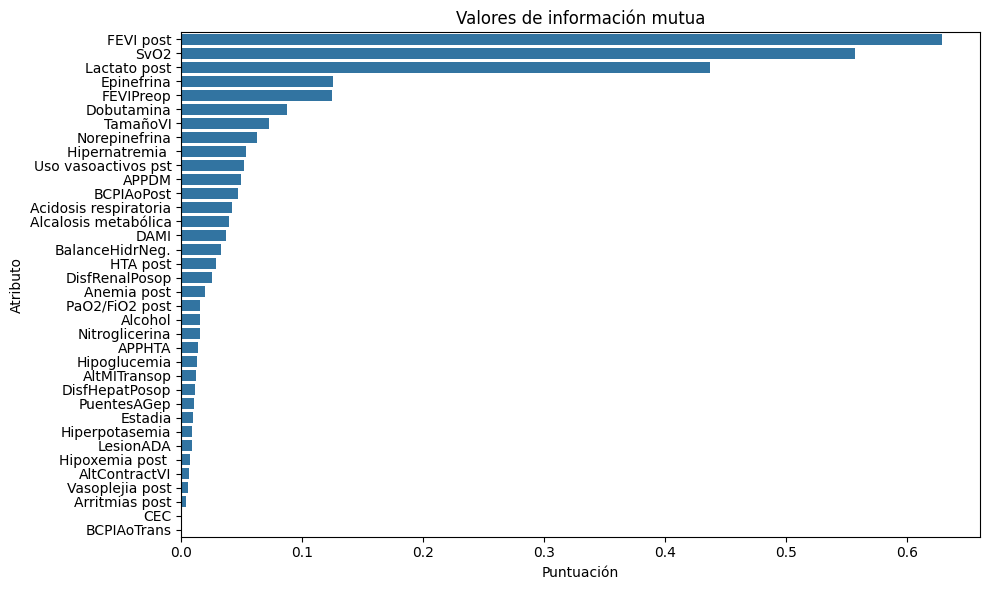

In [21]:
plot_mi_scores(get_mi_scores(X, y), 1)

In [22]:
# Variables finales a considerar
X.columns

Index(['Edad', 'Sexo', 'Café', 'Tabaco', 'Alcohol', 'APPHTA', 'APPDM',
       'APPEPOC', 'APPIRC', 'APPEnfValvular', 'APPIMA', 'APPAngina', 'APPACV',
       'No.LesionesCoronarias', 'LesionACD', 'Lesion TCI', 'LesionADA',
       'LesionACircunfleja', 'BCPIAoPrep', 'BCPIAoTrans', 'BCPIAoPost',
       'Dobutamina', 'Dopamina', 'Norepinefrina', 'Epinefrina',
       'Nitroglicerina', 'Hipoglucemia', 'Hiperglucemia', 'Hiponatremia',
       'Hipernatremia ', 'Hipopotasemia', 'Hiperpotasemia',
       'Acidosis metabólica', 'Alcalosis metabólica', 'Acidosis respiratoria',
       'Alcalosis respiratoria', 'DisfRenalPosop', 'DisfNeuroPosop',
       'DisfHepatPosop', 'Estadia', 'Egreso', 'Evoluciòn', 'FEVIPreop',
       'TamañoVI', 'AltContractVI', 'AMI', 'AMI+VSI', 'DAMI', 'DAM + VS',
       'PuentesAR', 'PuentesAGep', 'PuentesVen', 'RevascIncompleta', 'CEC',
       'DuracionCEC', 'Uso vasoactivos pst', 'AltMITransop', 'IMAPeriop',
       'Vasoplejia post', 'Hipoxemia post ', 'PaO2/FiO2 post',
 

In [23]:
# Almacenar el dataset limpio
data = X.join(y)
data.to_csv('data/processed/dataset.csv', index=False)